In [238]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling
import sklearn
# SKlearn Stuff

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
#helpers
%matplotlib inline



In [2]:
conda list

# packages in environment at C:\Users\ypbow\anaconda3\envs\Task1:
#
# Name                    Version                   Build  Channel
argon2-cffi               20.1.0           py39h2bbff1b_1  
async_generator           1.10               pyhd3eb1b0_0  
attrs                     20.3.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
blas                      1.0                         mkl  
bleach                    3.3.0              pyhd3eb1b0_0  
brotlipy                  0.7.0           py39h2bbff1b_1003  
ca-certificates           2021.1.19            haa95532_1  
certifi                   2020.12.5        py39haa95532_0  
cffi                      1.14.5           py39hcd4344a_0  
chardet                   4.0.0           py39haa95532_1003  
colorama                  0.4.4              pyhd3eb1b0_0  
confuse                   1.4.0              pyhd3eb1b0_0  
cryptography              3.4.6            py39h71e12ea_0  
cycler               

In [6]:
digits=load_digits()

In [7]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [8]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [9]:
df=pd.DataFrame(data)

In [10]:
df.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [11]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [12]:
data=data.drop_duplicates()


In [13]:
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [14]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [15]:
data_sample = data.sample(100)

In [16]:
df=pd.DataFrame(data)

In [17]:
import seaborn as sns 

Text(0.5, 1.0, 'Age of Customers in Different Regions')

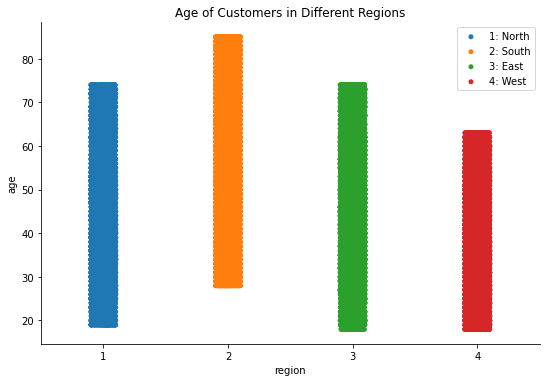

In [18]:
g = sns.catplot(x='region',data=data, y='age', aspect=1.5)
g.set_xlabels('region'),plt.legend(['1: North','2: South', '3: East ', '4: West']),
plt.title('Age of Customers in Different Regions')

In [45]:
data.groupby('amount')['age'].count()

amount
5.0047       1
5.0604       1
5.0660       1
5.1175       1
5.1583       1
            ..
2999.4000    1
2999.6000    2
2999.7000    1
2999.8000    1
3000.0000    2
Name: age, Length: 56112, dtype: int64

In [41]:
pd.DataFrame(data.groupby('region')['age'].mean())

,age
region,
1,43.704132
2,56.609083
3,45.646944
4,38.752424


In [46]:
mx = data.groupby('region')['age'].max()

In [21]:
print [data ('min','max')]

TypeError: 'DataFrame' object is not callable

In [47]:
mn = data.groupby('region')['age'].min()

In [54]:
pd.DataFrame([mx, mn])

region,1,2,3,4
age,74,85,74,63
age,19,28,18,18


In [23]:
df[0:6]

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
5,0,24,3,1314.20,4


In [128]:
x_data=data.iloc[0:4,0:4]

In [129]:
x_data

,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25


In [130]:
data[['in-store', 'age','amount', 'region']]

,in-store,age,amount,region
0,0,37,281.03,2
1,0,35,219.51,2
2,1,45,1525.70,4
3,1,46,715.25,3
4,1,33,1937.50,1
...,...,...,...,...
79995,1,71,558.82,1
79996,0,59,1932.00,3
79997,0,54,414.16,2
79998,1,49,335.32,1


In [131]:
data_modified=data[['in-store', 'age','amount', 'region']]

In [132]:
x_data= data[['in-store','items','age','amount']]
y_data = data['region']

In [133]:
x_data

,in-store,items,age,amount
0,0,4,37,281.03
1,0,2,35,219.51
2,1,3,45,1525.70
3,1,3,46,715.25
4,1,4,33,1937.50
...,...,...,...,...
79995,1,3,71,558.82
79996,0,7,59,1932.00
79997,0,1,54,414.16
79998,1,4,49,335.32


In [135]:
#features
x_data=data.iloc[:,0:4]

In [136]:
print('Summary of feature sample')
x_data.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [137]:
#dependable variable
y_data

0        2
1        2
2        4
3        3
4        1
        ..
79995    1
79996    3
79997    2
79998    1
79999    3
Name: region, Length: 79979, dtype: int64

In [138]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size = 0.3, random_state = 123)

In [139]:
x_test

,in-store,age,items,amount
58004,0,19,3,2353.700
46895,0,49,3,2770.900
16152,1,47,2,797.210
62843,0,67,4,263.000
35729,0,40,2,1783.700
...,...,...,...,...
30581,0,58,4,2785.800
77188,0,84,7,197.170
31362,1,22,4,87.953
7438,1,56,7,349.800


In [140]:
y_test

58004    4
46895    4
16152    1
62843    2
35729    4
        ..
30581    4
77188    2
31362    1
7438     1
14034    2
Name: region, Length: 23994, dtype: int64

In [141]:
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(x_train,y_train)

In [142]:
#Predictions
preds = model.predict(x_test)

In [143]:
x_test

,in-store,age,items,amount
58004,0,19,3,2353.700
46895,0,49,3,2770.900
16152,1,47,2,797.210
62843,0,67,4,263.000
35729,0,40,2,1783.700
...,...,...,...,...
30581,0,58,4,2785.800
77188,0,84,7,197.170
31362,1,22,4,87.953
7438,1,56,7,349.800


In [144]:
preds

array([3, 4, 3, ..., 4, 3, 2], dtype=int64)

In [145]:
### print(classification_report(y_test, preds))

In [146]:
from sklearn.tree import plot_tree

In [147]:
from sklearn.tree import export_text

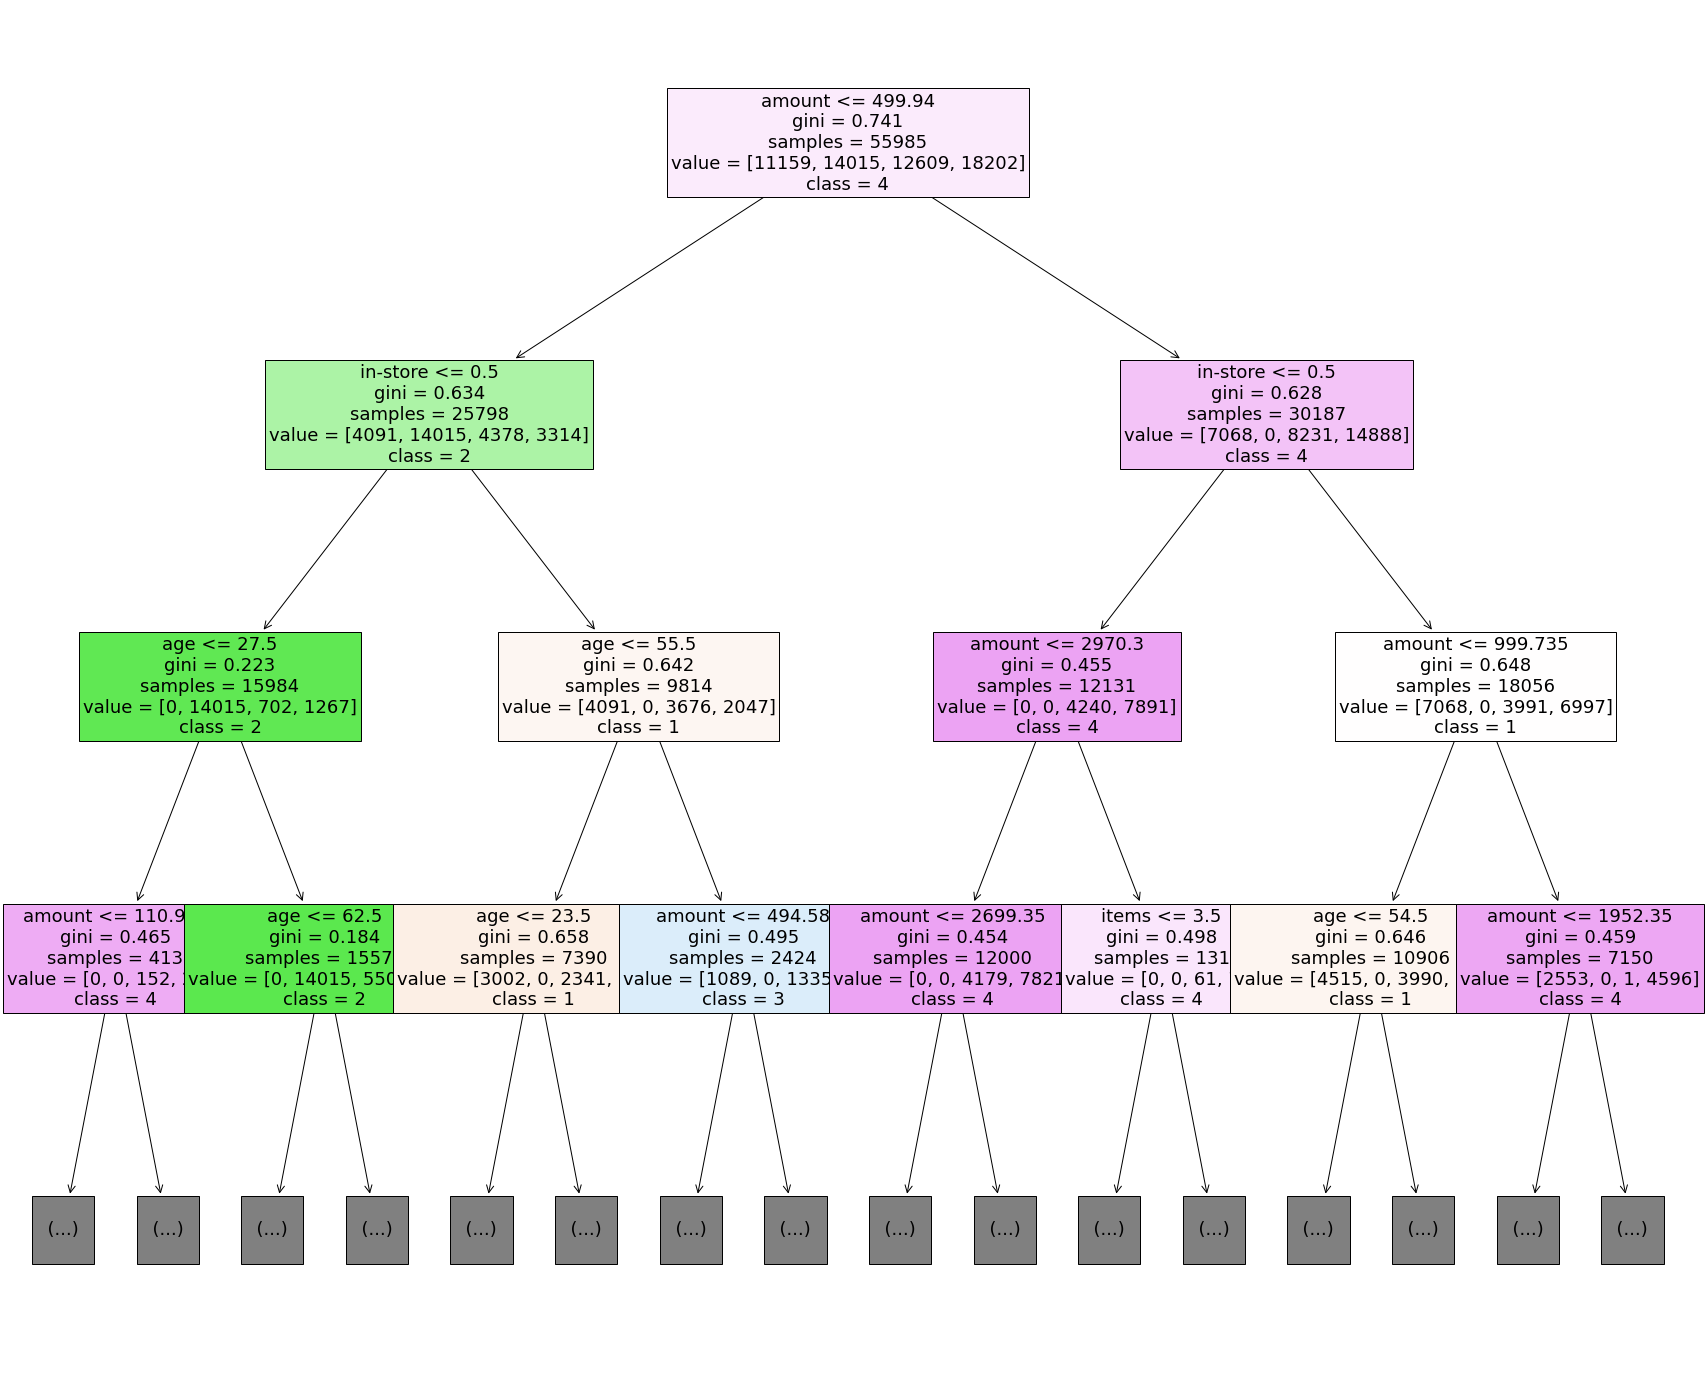

In [148]:
fig = plt.figure(figsize=(30,25))
tree = plot_tree(model, feature_names=x_data.columns,class_names=['1', '2', '3', '4'],
                 max_depth=3, filled=True, fontsize=18)


In [149]:
text_representation=print(tree)

[Text(837.0, 1223.1, 'amount <= 499.94\ngini = 0.741\nsamples = 55985\nvalue = [11159, 14015, 12609, 18202]\nclass = 4'), Text(418.5, 951.3, 'in-store <= 0.5\ngini = 0.634\nsamples = 25798\nvalue = [4091, 14015, 4378, 3314]\nclass = 2'), Text(209.25, 679.5, 'age <= 27.5\ngini = 0.223\nsamples = 15984\nvalue = [0, 14015, 702, 1267]\nclass = 2'), Text(104.625, 407.69999999999993, 'amount <= 110.905\ngini = 0.465\nsamples = 413\nvalue = [0, 0, 152, 261]\nclass = 4'), Text(52.3125, 135.89999999999986, '\n  (...)  \n'), Text(156.9375, 135.89999999999986, '\n  (...)  \n'), Text(313.875, 407.69999999999993, 'age <= 62.5\ngini = 0.184\nsamples = 15571\nvalue = [0, 14015, 550, 1006]\nclass = 2'), Text(261.5625, 135.89999999999986, '\n  (...)  \n'), Text(366.1875, 135.89999999999986, '\n  (...)  \n'), Text(627.75, 679.5, 'age <= 55.5\ngini = 0.642\nsamples = 9814\nvalue = [4091, 0, 3676, 2047]\nclass = 1'), Text(523.125, 407.69999999999993, 'age <= 23.5\ngini = 0.658\nsamples = 7390\nvalue = [30

In [150]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.39      0.39      4838
           2       0.91      0.90      0.91      5979
           3       0.37      0.38      0.37      5391
           4       0.53      0.53      0.53      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



In [151]:
from sklearn import linear_model
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [152]:
y_pred = linear_regression_model.predict(x_test)

# Age is dependable variable, 4 bins, accuracy .41

In [384]:
x_age_data= data[['in-store','items','region','amount']]
y_age_data = data['age']

Text(0.5, 0, 'Age')

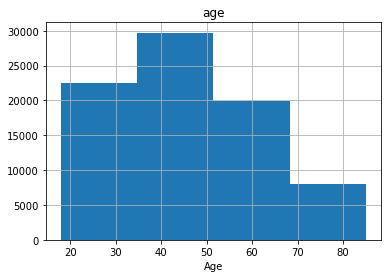

In [385]:
pd.DataFrame(y_age_data).hist(bins=4)
plt.xlabel('Age') #x label

In [386]:
y_age_data.max()

85

In [387]:
y_age_data = pd.cut(y_age_data, bins=[17, 35, 55,68, 86], labels = ['17-35', '35-55','55-68', '68-86'])


In [388]:
y_age_data.isna().sum()

0

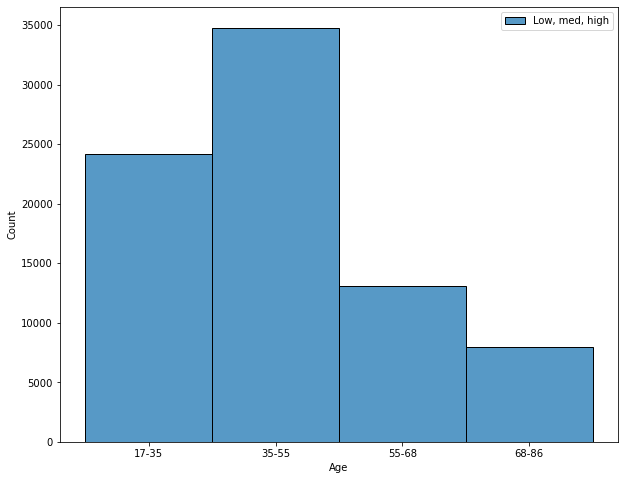

In [390]:
plt.figure(figsize=(10,8))
sns.histplot(y_age_data)
plt.xlabel('Age');
plt.legend(["Low, med, high"]);

Text(0.5, 0, 'Age')

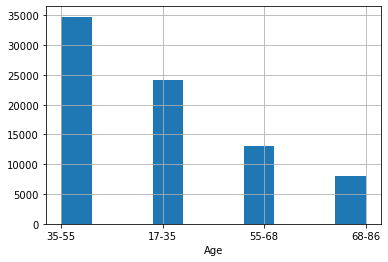

In [391]:
y_age_data.hist()
plt.xlabel('Age')

In [392]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_age_data, y_age_data,test_size = 0.3, random_state=123)

In [393]:
x_test

,in-store,items,region,amount
58004,0,3,4,2353.700
46895,0,3,4,2770.900
16152,1,2,1,797.210
62843,0,4,2,263.000
35729,0,2,4,1783.700
...,...,...,...,...
30581,0,4,4,2785.800
77188,0,7,2,197.170
31362,1,4,1,87.953
7438,1,7,1,349.800


In [394]:
y_test

58004    17-35
46895    35-55
16152    35-55
62843    55-68
35729    35-55
         ...  
30581    55-68
77188    68-86
31362    17-35
7438     55-68
14034    35-55
Name: age, Length: 23994, dtype: category
Categories (4, object): ['17-35' < '35-55' < '55-68' < '68-86']

In [395]:
y_train.isna().sum()

0

In [396]:
# DecisionTreeClassifier
#Modeling (Classification)
algo_age = DecisionTreeClassifier(max_depth=10)

In [397]:
#Predictions
preds_age = model_age.predict(x_test)

In [398]:
print(classification_report(y_test, preds_age))

              precision    recall  f1-score   support

       17-35       0.38      0.16      0.22      7209
       35-55       0.43      0.80      0.56     10447
       55-68       0.21      0.05      0.08      3911
       68-86       0.24      0.08      0.12      2427

    accuracy                           0.41     23994
   macro avg       0.31      0.27      0.25     23994
weighted avg       0.36      0.41      0.34     23994



In [399]:
#RandomForestClassifier
#Modeling (Classification)
algo_age_2 = RandomForestClassifier()
model_age_2 = algo_age_2.fit(x_train,y_train)

In [377]:
#Predictions
preds_age_2 = model_age_2.predict(x_test)

In [378]:
print(classification_report(y_test, preds_age_2))

              precision    recall  f1-score   support

       17-35       0.35      0.34      0.34      7209
       35-55       0.44      0.45      0.44     10447
       55-68       0.21      0.21      0.21      3911
       68-86       0.24      0.23      0.24      2427

    accuracy                           0.35     23994
   macro avg       0.31      0.31      0.31     23994
weighted avg       0.35      0.35      0.35     23994



In [400]:
#GradientBoostingClassifier

In [401]:
#Modeling (Classification)
algo_age_2 = GradientBoostingClassifier()
model_age_2 = algo_age_2.fit(x_train,y_train)
#Predictions
preds_age_2 = model_age_2.predict(x_test)
print(classification_report(y_test, preds_age_2))

              precision    recall  f1-score   support

       17-35       0.41      0.05      0.08      7209
       35-55       0.43      0.95      0.60     10447
       55-68       0.10      0.00      0.00      3911
       68-86       0.29      0.04      0.06      2427

    accuracy                           0.43     23994
   macro avg       0.31      0.26      0.19     23994
weighted avg       0.36      0.43      0.29     23994



In [184]:
print(cross_val_score(model, x_age_data, y_age_data, cv=5)) # cv = number of folds being held out

[0.36065266 0.35621405 0.3604026  0.3572143  0.35211003]


# Age is dependable variable, 6 bins, accuracy .32

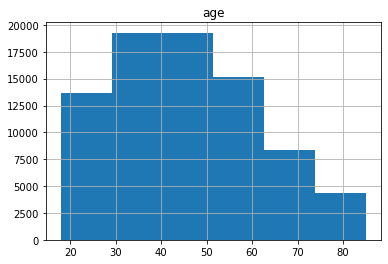

In [187]:
x_age6_data= data[['in-store','items','region','amount']]
y_age6_data = data['age']
pd.DataFrame(y_age6_data).hist(bins=6)
y_age6_data = pd.cut(y_age6_data, bins=[17, 28,40, 51,73, 86], labels = ['17-28', '28-40', '40-51','51-73','73-86'])

<AxesSubplot:>

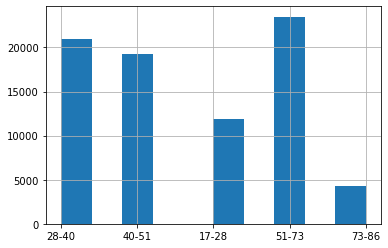

In [188]:
y_age6_data.hist()

In [189]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_age6_data, y_age6_data,test_size = 0.3, random_state=123)
x_test

,in-store,items,region,amount
58004,0,3,4,2353.700
46895,0,3,4,2770.900
16152,1,2,1,797.210
62843,0,4,2,263.000
35729,0,2,4,1783.700
...,...,...,...,...
30581,0,4,4,2785.800
77188,0,7,2,197.170
31362,1,4,1,87.953
7438,1,7,1,349.800


In [190]:
y_test

58004    17-28
46895    40-51
16152    40-51
62843    51-73
35729    28-40
         ...  
30581    51-73
77188    73-86
31362    17-28
7438     51-73
14034    28-40
Name: age, Length: 23994, dtype: category
Categories (5, object): ['17-28' < '28-40' < '40-51' < '51-73' < '73-86']

In [191]:
#DecisionTreeClassifier
algo_age6 = DecisionTreeClassifier(max_depth=20, )
model_age6 = algo_age6.fit(x_train,y_train)
#Predictions
preds_age6 = model_age6.predict(x_test)
print(classification_report(y_test, preds_age6))

              precision    recall  f1-score   support

       17-28       0.22      0.12      0.15      3575
       28-40       0.28      0.38      0.32      6249
       40-51       0.27      0.11      0.16      5814
       51-73       0.38      0.59      0.46      7053
       73-86       0.21      0.04      0.07      1303

    accuracy                           0.32     23994
   macro avg       0.27      0.25      0.23     23994
weighted avg       0.29      0.32      0.28     23994



In [192]:
#RandomForestClassifier
algo_age6 = RandomForestClassifier()
model_age6 = algo_age6.fit(x_train,y_train)
#Predictions
preds_age6= model_age6.predict(x_test)
print(classification_report(y_test, preds_age6))

              precision    recall  f1-score   support

       17-28       0.21      0.20      0.21      3575
       28-40       0.27      0.28      0.27      6249
       40-51       0.24      0.24      0.24      5814
       51-73       0.34      0.34      0.34      7053
       73-86       0.20      0.19      0.19      1303

    accuracy                           0.27     23994
   macro avg       0.25      0.25      0.25     23994
weighted avg       0.27      0.27      0.27     23994



In [193]:
#GradientBoostingClassifier
#Modeling (Classification)
algo_age6 = GradientBoostingClassifier()
model_age6 = algo_age6.fit(x_train,y_train)
#Predictions
preds_age6= model_age6.predict(x_test)
print(classification_report(y_test, preds_age6))

              precision    recall  f1-score   support

       17-28       0.23      0.02      0.04      3575
       28-40       0.30      0.43      0.36      6249
       40-51       0.29      0.04      0.07      5814
       51-73       0.38      0.74      0.50      7053
       73-86       0.15      0.00      0.01      1303

    accuracy                           0.34     23994
   macro avg       0.27      0.25      0.20     23994
weighted avg       0.30      0.34      0.26     23994



In [194]:
print(cross_val_score(model, x_age6_data, y_age6_data, cv=5)) # cv = number of folds being held out

[0.27456864 0.2688172  0.27656914 0.26731683 0.26908409]


# Age is dependable variable, 8 bins, accuracy .19

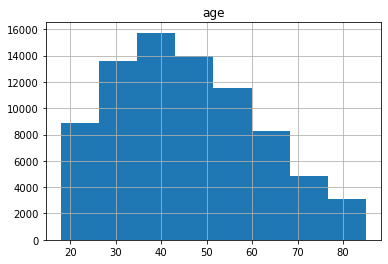

In [68]:
x_age_data= data[['in-store','items','region','amount']]
y_age_data = data['age']
pd.DataFrame(y_age_data).hist(bins=8)
y_age_data = pd.cut(y_age_data, bins=[17, 27,34,43, 51,60,68,75,86], 
                    labels = ['l7-27', '27-34', '34-43','43-51','51-60','60-68','68-75','75-86'])

<AxesSubplot:>

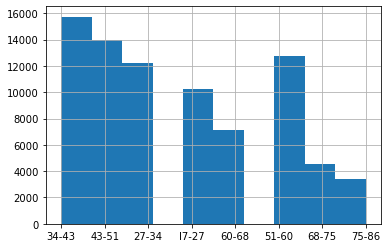

In [69]:
y_age_data.hist()

In [70]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_age_data, y_age_data,test_size = 0.3, random_state=123)
x_test

,in-store,items,region,amount
58004,0,3,4,2353.700
46895,0,3,4,2770.900
16152,1,2,1,797.210
62843,0,4,2,263.000
35729,0,2,4,1783.700
...,...,...,...,...
30581,0,4,4,2785.800
77188,0,7,2,197.170
31362,1,4,1,87.953
7438,1,7,1,349.800


In [71]:
y_test

58004    l7-27
46895    43-51
16152    43-51
62843    60-68
35729    34-43
         ...  
30581    51-60
77188    75-86
31362    l7-27
7438     51-60
14034    34-43
Name: age, Length: 23994, dtype: category
Categories (8, object): ['l7-27' < '27-34' < '34-43' < '43-51' < '51-60' < '60-68' < '68-75' < '75-86']

In [72]:
#DecisionTreeClassifier(
#Modeling (Classification)
algo_age = DecisionTreeClassifier(max_depth=15, )
model_age = algo_age.fit(x_train,y_train)
#Predictions
preds_age = model_age.predict(x_test)
print(classification_report(y_test, preds_age))

              precision    recall  f1-score   support

       27-34       0.17      0.05      0.08      3598
       34-43       0.20      0.31      0.25      4725
       43-51       0.18      0.06      0.09      4210
       51-60       0.18      0.23      0.20      3795
       60-68       0.12      0.02      0.03      2134
       68-75       0.07      0.00      0.01      1410
       75-86       0.17      0.79      0.28      1017
       l7-27       0.21      0.30      0.25      3105

    accuracy                           0.19     23994
   macro avg       0.16      0.22      0.15     23994
weighted avg       0.17      0.19      0.15     23994



In [73]:
# RandomForestClassifier
#Modeling (Classification)
algo_age = RandomForestClassifier()
model_age = algo_age.fit(x_train,y_train)
#Predictions
preds_age = model_age.predict(x_test)
print(classification_report(y_test, preds_age))

              precision    recall  f1-score   support

       27-34       0.16      0.16      0.16      3598
       34-43       0.19      0.20      0.19      4725
       43-51       0.17      0.17      0.17      4210
       51-60       0.17      0.17      0.17      3795
       60-68       0.13      0.12      0.12      2134
       68-75       0.11      0.11      0.11      1410
       75-86       0.17      0.17      0.17      1017
       l7-27       0.19      0.18      0.19      3105

    accuracy                           0.17     23994
   macro avg       0.16      0.16      0.16     23994
weighted avg       0.17      0.17      0.17     23994



In [74]:
#GradientBoostingClassifier
#Modeling (Classification)
algo_age_2 = GradientBoostingClassifier()
model_age_2 = algo_age_2.fit(x_train,y_train)
#Predictions
preds_age_2 = model_age_2.predict(x_test)
print(classification_report(y_test, preds_age_2))

              precision    recall  f1-score   support

       27-34       0.18      0.01      0.02      3598
       34-43       0.20      0.45      0.28      4725
       43-51       0.23      0.04      0.07      4210
       51-60       0.19      0.19      0.19      3795
       60-68       0.09      0.00      0.01      2134
       68-75       0.10      0.01      0.01      1410
       75-86       0.17      0.47      0.25      1017
       l7-27       0.21      0.37      0.27      3105

    accuracy                           0.20     23994
   macro avg       0.17      0.19      0.14     23994
weighted avg       0.18      0.20      0.15     23994



In [75]:
print(cross_val_score(model, x_age_data, y_age_data, cv=5)) # cv = number of folds being held out

[0.17554389 0.16716679 0.17466867 0.16872968 0.17005314]


# Age is dependable variable, 2 bins, accuracy .68

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

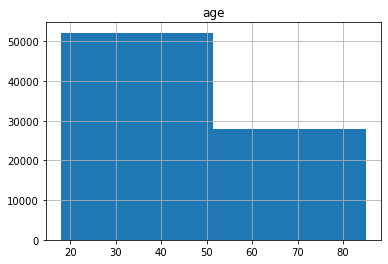

In [206]:
x_age3_data= data[['in-store','items','region','amount']]
y_age3_data = data['age']
pd.DataFrame(y_age3_data).hist(bins=2)

In [207]:
y_age3_data = pd.cut(y_age3_data, bins=[17,50,86], labels = ['l6-50','51-86'])

<AxesSubplot:>

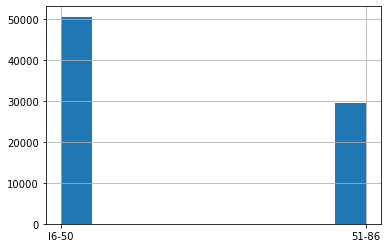

In [208]:
y_age3_data.hist()

In [209]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_age3_data, y_age3_data,test_size = 0.3, random_state=123)
x_test

,in-store,items,region,amount
58004,0,3,4,2353.700
46895,0,3,4,2770.900
16152,1,2,1,797.210
62843,0,4,2,263.000
35729,0,2,4,1783.700
...,...,...,...,...
30581,0,4,4,2785.800
77188,0,7,2,197.170
31362,1,4,1,87.953
7438,1,7,1,349.800


In [210]:
y_test

58004    l6-50
46895    l6-50
16152    l6-50
62843    51-86
35729    l6-50
         ...  
30581    51-86
77188    51-86
31362    l6-50
7438     51-86
14034    l6-50
Name: age, Length: 23994, dtype: category
Categories (2, object): ['l6-50' < '51-86']

In [211]:
y_age3_data.max()

'51-86'

In [212]:
# DecisionTreeClassifier
#Modeling (Classification)
algo_age3 = DecisionTreeClassifier(max_depth=10, )
model_age3 = algo_age3.fit(x_train,y_train)
#Predictions
preds_age3 = model_age3.predict(x_test)
print(classification_report(y_test, preds_age3))

              precision    recall  f1-score   support

       51-86       0.60      0.42      0.49      8844
       l6-50       0.71      0.84      0.77     15150

    accuracy                           0.68     23994
   macro avg       0.66      0.63      0.63     23994
weighted avg       0.67      0.68      0.67     23994



In [213]:
#RandomForestClassifier
algo_age3 = RandomForestClassifier()
model_age3= algo_age3.fit(x_train,y_train)
#Predictions
preds_age3 = model_age3.predict(x_test)
print(classification_report(y_test, preds_age3))

              precision    recall  f1-score   support

       51-86       0.45      0.45      0.45      8844
       l6-50       0.68      0.68      0.68     15150

    accuracy                           0.60     23994
   macro avg       0.57      0.57      0.57     23994
weighted avg       0.60      0.60      0.60     23994



In [214]:
#GradientBoostingClassifier
algo_age3 = GradientBoostingClassifier()
model_age3= algo_age3.fit(x_train,y_train)
#Predictions
preds_age3 = model_age3.predict(x_test)
print(classification_report(y_test, preds_age3))

              precision    recall  f1-score   support

       51-86       0.61      0.41      0.49      8844
       l6-50       0.71      0.84      0.77     15150

    accuracy                           0.68     23994
   macro avg       0.66      0.63      0.63     23994
weighted avg       0.67      0.68      0.67     23994



In [215]:
print(cross_val_score(model, x_age3_data, y_age3_data, cv=5)) # cv = number of folds being held out

[0.59877469 0.59346087 0.59846212 0.59346087 0.59206002]


# Amount  is dependable variable , 7 bins, accuracu .45

array([[<AxesSubplot:title={'center':'amount'}>]], dtype=object)

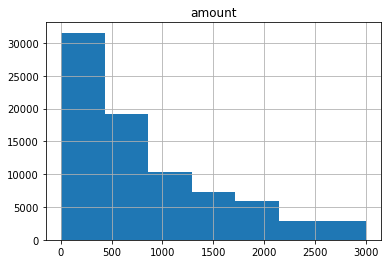

In [226]:
x_amount_data= data[['in-store','age','items','region',]]
y_amount_data = data['amount']
pd.DataFrame(y_amount_data).hist(bins=7)

In [227]:
y_amount_data.min()

5.0047

In [228]:
y_amount_data = pd.cut(y_amount_data, bins =[3,490,800,1200, 1700, 2300,2500,3000],
                       labels = ['3', '490','800','1200','1700','2200','2500'])

<AxesSubplot:>

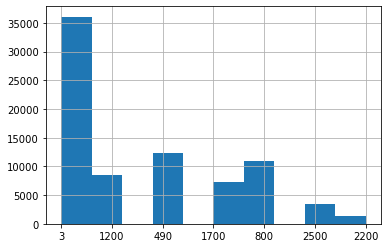

In [229]:
y_amount_data.hist()

In [230]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_amount_data, y_amount_data,test_size = 0.3, random_state=123)
x_test

,in-store,age,items,region
58004,0,19,3,4
46895,0,49,3,4
16152,1,47,2,1
62843,0,67,4,2
35729,0,40,2,4
...,...,...,...,...
30581,0,58,4,4
77188,0,84,7,2
31362,1,22,4,1
7438,1,56,7,1


In [231]:
y_test

58004    2200
46895    2500
16152     490
62843       3
35729    1700
         ... 
30581    2500
77188       3
31362       3
7438        3
14034       3
Name: amount, Length: 23994, dtype: category
Categories (7, object): ['3' < '490' < '800' < '1200' < '1700' < '2200' < '2500']

In [232]:
#DecisionTreeClassifier
#Modeling (Classification)
algo_amount = DecisionTreeClassifier(max_depth=20, )
model_amount = algo_amount.fit(x_train,y_train)
#Predictions
preds_amount= model_amount.predict(x_test)
print(classification_report(y_test, preds_amount))

              precision    recall  f1-score   support

        1200       0.21      0.31      0.25      2585
        1700       0.20      0.20      0.20      2137
        2200       0.00      0.00      0.00       397
        2500       0.16      0.17      0.17      1007
           3       0.64      0.80      0.71     10812
         490       0.24      0.11      0.15      3707
         800       0.19      0.08      0.12      3349

    accuracy                           0.45     23994
   macro avg       0.23      0.24      0.23     23994
weighted avg       0.40      0.45      0.41     23994



In [233]:
#RandomForestClassifier
#Modeling (Classification)
algo_amount = RandomForestClassifier()
model_amount= algo_amount.fit(x_train,y_train)
#Predictions
preds_amount = model_amount.predict(x_test)
print(classification_report(y_test, preds_amount))

              precision    recall  f1-score   support

        1200       0.21      0.25      0.23      2585
        1700       0.20      0.19      0.20      2137
        2200       0.03      0.01      0.01       397
        2500       0.16      0.18      0.17      1007
           3       0.63      0.79      0.71     10812
         490       0.23      0.13      0.17      3707
         800       0.20      0.12      0.15      3349

    accuracy                           0.45     23994
   macro avg       0.24      0.24      0.23     23994
weighted avg       0.40      0.45      0.41     23994



In [239]:
#GradientBoostingClassifier
#Modeling (Classification)
algo_amount = GradientBoostingClassifier()
model_amount= algo_amount.fit(x_train,y_train)
#Predictions
preds_amount = model_amount.predict(x_test)
print(classification_report(y_test, preds_amount))

C:\Users\ypbow\anaconda3\envs\Task1\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        1200       0.25      0.39      0.30      2585
        1700       0.21      0.50      0.29      2137
        2200       0.00      0.00      0.00       397
        2500       0.09      0.01      0.03      1007
           3       0.64      0.85      0.73     10812
         490       0.27      0.00      0.00      3707
         800       0.20      0.01      0.01      3349

    accuracy                           0.47     23994
   macro avg       0.24      0.25      0.20     23994
weighted avg       0.41      0.47      0.39     23994



C:\Users\ypbow\anaconda3\envs\Task1\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ypbow\anaconda3\envs\Task1\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [240]:
print(cross_val_score(model, x_amount_data, y_amount_data, cv=5)) # cv = number of folds being held out

[0.45817704 0.4508002  0.4459865  0.45098775 0.45057831]


# Amount is dependable variable, 3 bins, accuracy  .71

array([[<AxesSubplot:title={'center':'amount'}>]], dtype=object)

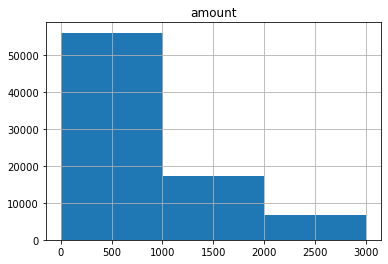

In [241]:
x_amount3_data= data[['in-store','age','items','region',]]
y_amount3_data = data['amount']
pd.DataFrame(y_amount3_data).hist(bins=3)

In [242]:
x_amount3_data

,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1
...,...,...,...,...
79995,1,71,3,1
79996,0,59,7,3
79997,0,54,1,2
79998,1,49,4,1


In [243]:
y_amount3_data

0         281.03
1         219.51
2        1525.70
3         715.25
4        1937.50
          ...   
79995     558.82
79996    1932.00
79997     414.16
79998     335.32
79999     527.12
Name: amount, Length: 79979, dtype: float64

In [244]:
y_amount3_data = pd.cut(y_amount3_data, bins =[3,1000, 2000,3001],
                       labels = ['low', 'med','high'])


<AxesSubplot:>

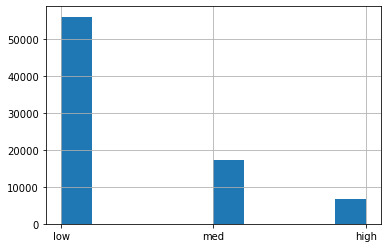

In [245]:
y_amount3_data.hist()

In [246]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_amount3_data, y_amount3_data,test_size = 0.3, random_state=123)
x_test

,in-store,age,items,region
58004,0,19,3,4
46895,0,49,3,4
16152,1,47,2,1
62843,0,67,4,2
35729,0,40,2,4
...,...,...,...,...
30581,0,58,4,4
77188,0,84,7,2
31362,1,22,4,1
7438,1,56,7,1


In [247]:
y_test

58004    high
46895    high
16152     low
62843     low
35729     med
         ... 
30581    high
77188     low
31362     low
7438      low
14034     low
Name: amount, Length: 23994, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

In [248]:
#DecisionTreeClassifier
#Modeling (Classification)
algo_amount3 = DecisionTreeClassifier(max_depth=20,)
model_amount3 = algo_amount3.fit(x_train,y_train)
#Predictions
preds_amount3= model_amount3.predict(x_test)
print(classification_report(y_test, preds_amount3))

              precision    recall  f1-score   support

        high       0.34      0.38      0.36      2009
         low       0.83      0.86      0.84     16833
         med       0.43      0.36      0.39      5152

    accuracy                           0.71     23994
   macro avg       0.53      0.53      0.53     23994
weighted avg       0.70      0.71      0.70     23994



In [249]:
#RandomForestClassifier
#Modeling (Classification)
algo_amount3 = RandomForestClassifier()
model_amount3= algo_amount3.fit(x_train,y_train)
#Predictions
preds_amount3 = model_amount3.predict(x_test)
print(classification_report(y_test, preds_amount3))

              precision    recall  f1-score   support

        high       0.34      0.32      0.33      2009
         low       0.83      0.85      0.84     16833
         med       0.43      0.39      0.41      5152

    accuracy                           0.71     23994
   macro avg       0.53      0.52      0.53     23994
weighted avg       0.70      0.71      0.70     23994



In [250]:
#GradientBoostingClassifier
#Modeling (Classification)
algo_amount3 = GradientBoostingClassifier()
model_amount3= algo_amount3.fit(x_train,y_train)
#Predictions
preds_amount3 = model_amount3.predict(x_test)
print(classification_report(y_test, preds_amount3))

              precision    recall  f1-score   support

        high       0.33      0.22      0.27      2009
         low       0.87      0.82      0.85     16833
         med       0.41      0.54      0.47      5152

    accuracy                           0.71     23994
   macro avg       0.54      0.53      0.53     23994
weighted avg       0.73      0.71      0.72     23994



In [251]:
print(cross_val_score(model, x_amount3_data, y_amount3_data, cv=5)) # cv = number of folds being held out

[0.70605151 0.7028007  0.70642661 0.70417604 0.70622069]


# Correlation Matrix

In [252]:
corrMat=data.corr()
print(corrMat)


          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


# Region is dependable variable, accuracy .61

In [254]:
#region is dependable variable
x_region_data= data[['in-store','items','age','amount']]
y_region_data = data['region']

array([[<AxesSubplot:title={'center':'region'}>]], dtype=object)

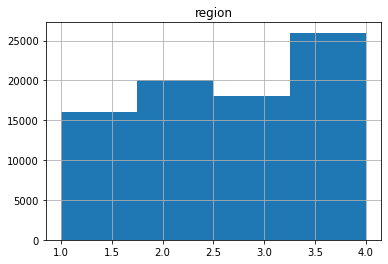

In [255]:
pd.DataFrame(y_region_data).hist(bins=4)

In [256]:
x_region_data

,in-store,items,age,amount
0,0,4,37,281.03
1,0,2,35,219.51
2,1,3,45,1525.70
3,1,3,46,715.25
4,1,4,33,1937.50
...,...,...,...,...
79995,1,3,71,558.82
79996,0,7,59,1932.00
79997,0,1,54,414.16
79998,1,4,49,335.32


In [257]:
y_region_data

0        2
1        2
2        4
3        3
4        1
        ..
79995    1
79996    3
79997    2
79998    1
79999    3
Name: region, Length: 79979, dtype: int64

In [258]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_region_data, y_region_data,test_size = 0.3, random_state=123)
x_test

,in-store,items,age,amount
58004,0,3,19,2353.700
46895,0,3,49,2770.900
16152,1,2,47,797.210
62843,0,4,67,263.000
35729,0,2,40,1783.700
...,...,...,...,...
30581,0,4,58,2785.800
77188,0,7,84,197.170
31362,1,4,22,87.953
7438,1,7,56,349.800


In [259]:
y_test

58004    4
46895    4
16152    1
62843    2
35729    4
        ..
30581    4
77188    2
31362    1
7438     1
14034    2
Name: region, Length: 23994, dtype: int64

In [260]:
#Modeling (Classification)
algo_region = DecisionTreeClassifier(max_depth=20, )
model_region = algo_region.fit(x_train,y_train)
#Predictions
preds_region= model_region.predict(x_test)
print(classification_report(y_test, preds_region))

              precision    recall  f1-score   support

           1       0.41      0.50      0.45      4838
           2       0.90      0.97      0.94      5979
           3       0.42      0.29      0.34      5391
           4       0.61      0.63      0.62      7786

    accuracy                           0.61     23994
   macro avg       0.59      0.60      0.59     23994
weighted avg       0.60      0.61      0.60     23994



In [261]:
#Modeling (Classification)
algo_region = RandomForestClassifier()
model_region = algo_region.fit(x_train,y_train)
#Predictions
preds_region= model_region.predict(x_test)
print(classification_report(y_test, preds_region))

              precision    recall  f1-score   support

           1       0.40      0.38      0.39      4838
           2       0.91      0.96      0.93      5979
           3       0.38      0.35      0.36      5391
           4       0.56      0.57      0.56      7786

    accuracy                           0.58     23994
   macro avg       0.56      0.57      0.56     23994
weighted avg       0.57      0.58      0.58     23994



In [262]:
#GradientBoostingClassifier
#Modeling (Classification)
algo_region = GradientBoostingClassifier()
model_region= algo_region.fit(x_train,y_train)
#Predictions
preds_region = model_region.predict(x_test)
print(classification_report(y_test, preds_region))

              precision    recall  f1-score   support

           1       0.40      0.52      0.45      4838
           2       0.90      1.00      0.95      5979
           3       0.52      0.23      0.32      5391
           4       0.65      0.73      0.69      7786

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.60     23994
weighted avg       0.63      0.64      0.62     23994



In [263]:
print(cross_val_score(model, x_region_data, y_region_data, cv=5)) # cv = number of folds being held out

[0.5660165  0.55763941 0.56870468 0.56264066 0.56336355]


# Region is dependable variable, items removed, accuracy .61

In [264]:
#region is dependable variable, items removed
x_region2_data= data[['in-store','age','amount']]
y_region2_data = data['region']

array([[<AxesSubplot:title={'center':'region'}>]], dtype=object)

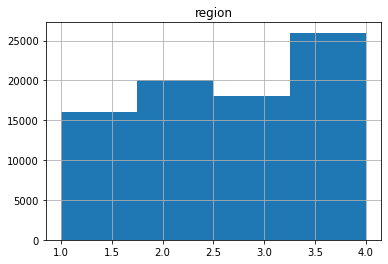

In [265]:
pd.DataFrame(y_region2_data).hist(bins=4)

In [266]:
x_region2_data

,in-store,age,amount
0,0,37,281.03
1,0,35,219.51
2,1,45,1525.70
3,1,46,715.25
4,1,33,1937.50
...,...,...,...
79995,1,71,558.82
79996,0,59,1932.00
79997,0,54,414.16
79998,1,49,335.32


In [267]:
y_region2_data

0        2
1        2
2        4
3        3
4        1
        ..
79995    1
79996    3
79997    2
79998    1
79999    3
Name: region, Length: 79979, dtype: int64

In [268]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_region2_data, y_region2_data,test_size = 0.3, random_state = 123)

In [269]:
x_test

,in-store,age,amount
58004,0,19,2353.700
46895,0,49,2770.900
16152,1,47,797.210
62843,0,67,263.000
35729,0,40,1783.700
...,...,...,...
30581,0,58,2785.800
77188,0,84,197.170
31362,1,22,87.953
7438,1,56,349.800


In [270]:
y_test

58004    4
46895    4
16152    1
62843    2
35729    4
        ..
30581    4
77188    2
31362    1
7438     1
14034    2
Name: region, Length: 23994, dtype: int64

In [271]:
#Modeling (Classification)
algo_region2 = DecisionTreeClassifier(max_depth=20, )
model_region2 = algo_region2.fit(x_train,y_train)
#Predictions
preds_region2= model_region2.predict(x_test)
print(classification_report(y_test, preds_region2))

              precision    recall  f1-score   support

           1       0.40      0.50      0.45      4838
           2       0.91      0.98      0.94      5979
           3       0.42      0.26      0.32      5391
           4       0.62      0.64      0.63      7786

    accuracy                           0.61     23994
   macro avg       0.59      0.60      0.59     23994
weighted avg       0.60      0.61      0.60     23994



In [272]:
#GradientBoostingClassifier
#Modeling (Classification)
algo_region2 = RandomForestClassifier()
model_region2= algo_region2.fit(x_train,y_train)
#Predictions
preds_region2 = model_region2.predict(x_test)
print(classification_report(y_test, preds_region2))

              precision    recall  f1-score   support

           1       0.39      0.39      0.39      4838
           2       0.91      0.92      0.92      5979
           3       0.37      0.36      0.37      5391
           4       0.53      0.53      0.53      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



In [273]:
#GradientBoostingClassifier
#Modeling (Classification)
algo_region2 = GradientBoostingClassifier()
model_region2= algo_region2.fit(x_train,y_train)
#Predictions
preds_region2 = model_region2.predict(x_test)
print(classification_report(y_test, preds_region2))

              precision    recall  f1-score   support

           1       0.40      0.52      0.46      4838
           2       0.90      1.00      0.95      5979
           3       0.53      0.23      0.32      5391
           4       0.65      0.73      0.69      7786

    accuracy                           0.64     23994
   macro avg       0.62      0.62      0.60     23994
weighted avg       0.64      0.64      0.62     23994



In [274]:
print(cross_val_score(model, x_region2_data, y_region2_data, cv=5)) # cv = number of folds being held out

[0.56870468 0.56707927 0.56614154 0.5623906  0.55723664]


# instore is dependable variable, accuracy .88

In [275]:
#instore is dependable variable
x_instore_data= data[['items','age','amount','region']]
y_instore_data = data['in-store']


(array([39989.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 39990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

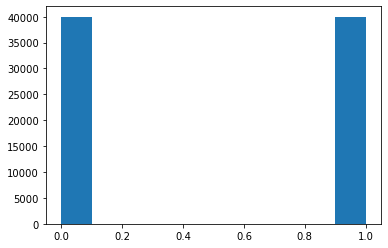

In [276]:
pd.DataFrame(y_instore_data).hist
plt.hist(data['in-store'])


In [277]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_instore_data, y_instore_data,test_size = 0.3, random_state = 123)

In [278]:
x_test

,items,age,amount,region
58004,3,19,2353.700,4
46895,3,49,2770.900,4
16152,2,47,797.210,1
62843,4,67,263.000,2
35729,2,40,1783.700,4
...,...,...,...,...
30581,4,58,2785.800,4
77188,7,84,197.170,2
31362,4,22,87.953,1
7438,7,56,349.800,1


In [279]:
y_test

58004    0
46895    0
16152    1
62843    0
35729    0
        ..
30581    0
77188    0
31362    1
7438     1
14034    0
Name: in-store, Length: 23994, dtype: int64

In [280]:
#Modeling (Classification)
algo_instore = DecisionTreeClassifier(max_depth=20, )
model_instore = algo_instore.fit(x_train,y_train)
#Predictions
preds_instore= model_instore.predict(x_test)
print(classification_report(y_test, preds_instore))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11874
           1       0.83      0.97      0.89     12120

    accuracy                           0.88     23994
   macro avg       0.90      0.88      0.88     23994
weighted avg       0.90      0.88      0.88     23994



In [283]:
model_instore.predict(np.array([20, 24, 2000, 2]).reshape(1,-1))

array([0], dtype=int64)

In [284]:
#RandomForestClassifier
#Modeling (Classification)
algo_instore = RandomForestClassifier()
model_instore= algo_instore.fit(x_train,y_train)
#Predictions
preds_instore = model_instore.predict(x_test)
print(classification_report(y_test, preds_instore))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85     11874
           1       0.84      0.89      0.86     12120

    accuracy                           0.86     23994
   macro avg       0.86      0.86      0.86     23994
weighted avg       0.86      0.86      0.86     23994



In [285]:
#GradientBoostingClassifier
#Modeling (Classification)
algo_instore = GradientBoostingClassifier()
model_instore= algo_instore.fit(x_train,y_train)
#Predictions
preds_instore = model_instore.predict(x_test)
print(classification_report(y_test, preds_instore))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87     11874
           1       0.82      1.00      0.90     12120

    accuracy                           0.89     23994
   macro avg       0.91      0.89      0.89     23994
weighted avg       0.91      0.89      0.89     23994



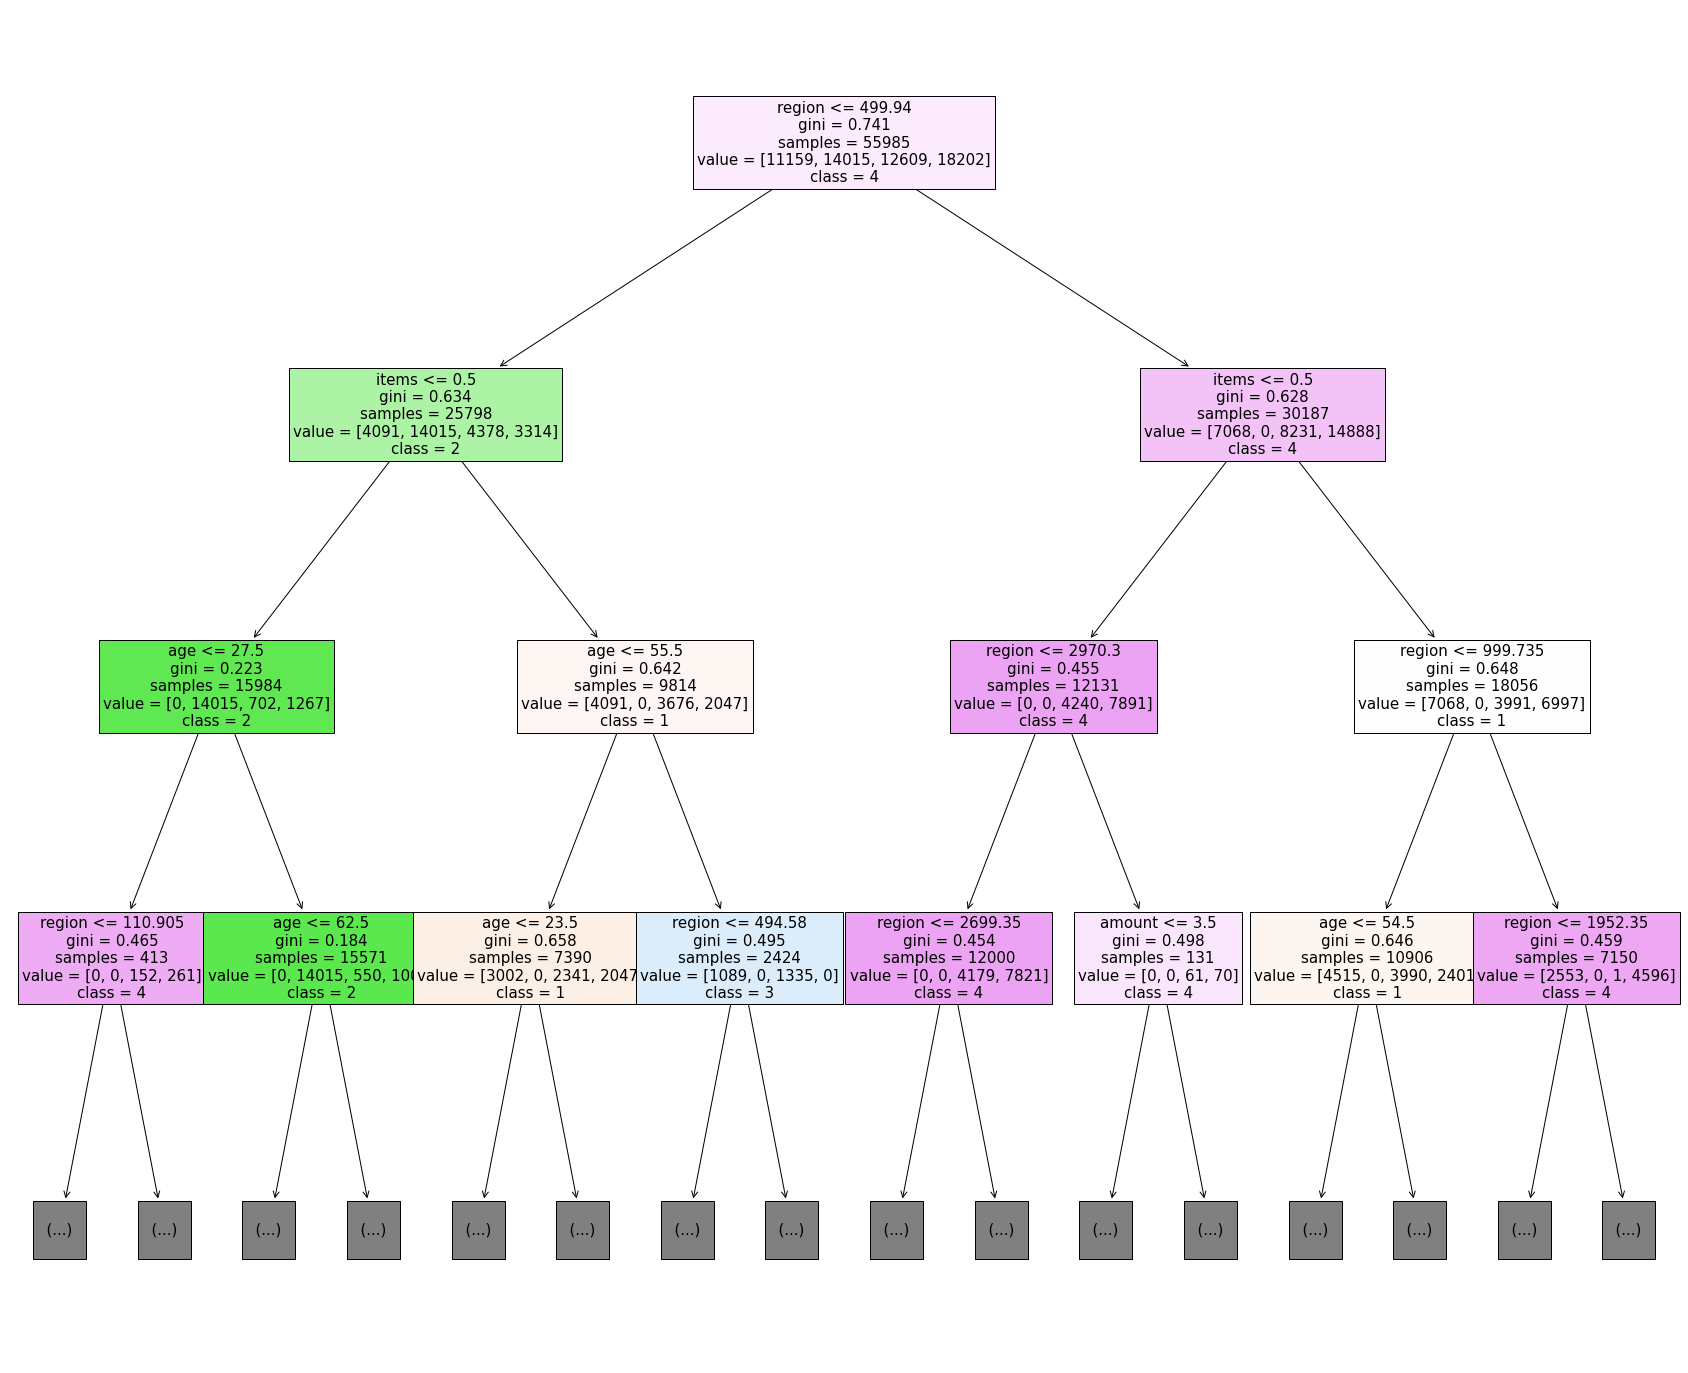

In [286]:
fig = plt.figure(figsize=(30,25))
tree = plot_tree(model, feature_names=x_instore_data.columns,class_names=['1', '2', '3', '4'],
                 max_depth=3, filled=True, fontsize=15)


In [138]:
from sklearn.model_selection import cross_val_score

In [287]:
#Modeling (Classification)
algo_instore = DecisionTreeClassifier(max_depth=20, )
model_instore = algo_instore.fit(x_train,y_train)
#Predictions
preds_instore= model_instore.predict(x_test)
print(classification_report(y_test, preds_instore))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     11874
           1       0.83      0.97      0.89     12120

    accuracy                           0.88     23994
   macro avg       0.90      0.88      0.88     23994
weighted avg       0.90      0.88      0.88     23994



In [288]:
np.random.seed(42)

In [289]:
print(cross_val_score(model, x_instore_data, y_instore_data, cv=5, )) # cv = number of folds being held out

[0.85227557 0.8415854  0.8435859  0.84452363 0.84488903]


In [290]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [291]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [292]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, x_instore_data,y_instore_data, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)

In [179]:
results

[array([0.86471618, 0.85915229, 0.86134034, 0.85783946, 0.86170678]),
 array([0.85096274, 0.84108527, 0.84527382, 0.84389847, 0.84470147]),
 array([0.88909727, 0.88509627, 0.88909727, 0.8864091 , 0.88596436])]

In [293]:
names

['Random Forest Classifier',
 'Decision Tree Classifier',
 'Gradient Bossting Class']

In [294]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8611635630070381
Decision Tree Classifier 0.8456594689466366
Gradient Bossting Class 0.8871328577689905


# instore is dependable variable,  age and region is independable,accuracy .79

In [295]:
#instore is dependable variable
x_instore2_data= data[['age','region']]
y_instore2_data = data['in-store']


(array([39989.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 39990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

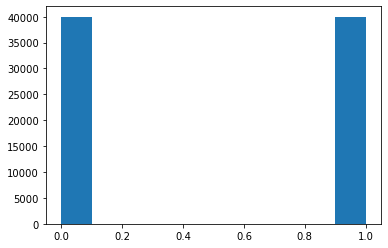

In [296]:
pd.DataFrame(y_instore2_data).hist
plt.hist(data['in-store'])

In [297]:
x_instore2_data

,age,region
0,37,2
1,35,2
2,45,4
3,46,3
4,33,1
...,...,...
79995,71,1
79996,59,3
79997,54,2
79998,49,1


In [298]:
y_instore2_data

0        0
1        0
2        1
3        1
4        1
        ..
79995    1
79996    0
79997    0
79998    1
79999    1
Name: in-store, Length: 79979, dtype: int64

In [299]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_instore2_data, y_instore2_data,test_size = 0.3, random_state=123)
x_test

,age,region
58004,19,4
46895,49,4
16152,47,1
62843,67,2
35729,40,4
...,...,...
30581,58,4
77188,84,2
31362,22,1
7438,56,1


In [300]:
x_test

,age,region
58004,19,4
46895,49,4
16152,47,1
62843,67,2
35729,40,4
...,...,...
30581,58,4
77188,84,2
31362,22,1
7438,56,1


In [301]:
y_test

58004    0
46895    0
16152    1
62843    0
35729    0
        ..
30581    0
77188    0
31362    1
7438     1
14034    0
Name: in-store, Length: 23994, dtype: int64

In [302]:
#DecisionTreeClassifier(
#Modeling (Classification)
algo_instore2 = DecisionTreeClassifier(max_depth=20, )
model_instore2 = algo_instore2.fit(x_train,y_train)
#Predictions
preds_instore2= model_instore2.predict(x_test)
print(classification_report(y_test, preds_instore2))

              precision    recall  f1-score   support

           0       0.96      0.61      0.74     11874
           1       0.72      0.98      0.83     12120

    accuracy                           0.79     23994
   macro avg       0.84      0.79      0.79     23994
weighted avg       0.84      0.79      0.79     23994



In [303]:
#RandomForestClassifier
#Modeling (Classification)
algo_instore2 = RandomForestClassifier()
model_instore2= algo_instore2.fit(x_train,y_train)
#Predictions
preds_instore2 = model_instore2.predict(x_test)
print(classification_report(y_test, preds_instore2))

              precision    recall  f1-score   support

           0       0.96      0.61      0.74     11874
           1       0.72      0.98      0.83     12120

    accuracy                           0.79     23994
   macro avg       0.84      0.79      0.79     23994
weighted avg       0.84      0.79      0.79     23994



In [304]:
#GradientBoostingClassifier
#Modeling (Classification)
algo_instore2 = GradientBoostingClassifier()
model_instore2= algo_instore2.fit(x_train,y_train)
#Predictions
preds_instore2 = model_instore2.predict(x_test)
print(classification_report(y_test, preds_instore2))

              precision    recall  f1-score   support

           0       0.98      0.60      0.74     11874
           1       0.72      0.99      0.83     12120

    accuracy                           0.80     23994
   macro avg       0.85      0.79      0.79     23994
weighted avg       0.85      0.80      0.79     23994



In [305]:
print(cross_val_score(model, x_instore2_data, y_instore2_data, cv=5, )) # cv = number of folds being held out

[0.79269817 0.79069767 0.79232308 0.79313578 0.7948734 ]


In [209]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [306]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [307]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, x_instore2_data,y_instore2_data, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)

In [308]:
results

[array([0.79094774, 0.79069767, 0.79232308, 0.79313578, 0.7948734 ]),
 array([0.79094774, 0.78988497, 0.79232308, 0.79313578, 0.7948734 ]),
 array([0.79269817, 0.79069767, 0.79232308, 0.79313578, 0.7948734 ])]

In [309]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7923955348011746
Decision Tree Classifier 0.7922329941660157
Gradient Bossting Class 0.7927456223230549


# instore is dependable variable,  age is independable,accuracy .?

In [310]:
#instore is dependable variable
x_instore3_data= data['age']
y_instore3_data = data['in-store']


(array([39989.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 39990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

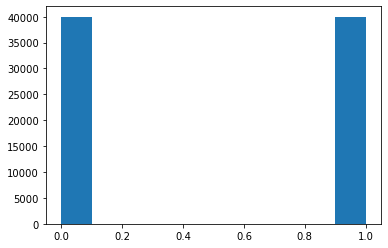

In [311]:
pd.DataFrame(y_instore3_data).hist
plt.hist(data['in-store'])

In [312]:
x_instore3_data

0        37
1        35
2        45
3        46
4        33
         ..
79995    71
79996    59
79997    54
79998    49
79999    30
Name: age, Length: 79979, dtype: int64

In [313]:
y_instore3_data

0        0
1        0
2        1
3        1
4        1
        ..
79995    1
79996    0
79997    0
79998    1
79999    1
Name: in-store, Length: 79979, dtype: int64

In [314]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_instore3_data, y_instore3_data,test_size = 0.3, random_state=123)
x_test

58004    19
46895    49
16152    47
62843    67
35729    40
         ..
30581    58
77188    84
31362    22
7438     56
14034    40
Name: age, Length: 23994, dtype: int64

In [315]:
x_test

58004    19
46895    49
16152    47
62843    67
35729    40
         ..
30581    58
77188    84
31362    22
7438     56
14034    40
Name: age, Length: 23994, dtype: int64

In [316]:
y_test

58004    0
46895    0
16152    1
62843    0
35729    0
        ..
30581    0
77188    0
31362    1
7438     1
14034    0
Name: in-store, Length: 23994, dtype: int64

In [318]:
model_instore3.reshape(1,-1)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'reshape'

In [319]:
#DecisionTreeClassifier(
#Modeling (Classification)
algo_instore3= DecisionTreeClassifier(max_depth=20, )
model_instore3 = algo_instore3.fit(x_train,y_train)
#Predictions
preds_instore3= model_instore3.predict(x_test)
print(classification_report(y_test, preds_instore3))
model_instore3.reshape(1,-1)

ValueError: Expected 2D array, got 1D array instead:
array=[46. 60. 41. ... 38. 46. 30.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [320]:
#DecisionTreeClassifier(
#Modeling (Classification)
algo_instore3= RandomForestClassifier(max_depth=20, )
model_instore3 = algo_instore3.fit(x_train,y_train)
#Predictions
preds_instore3= model_instore3.predict(x_test)
print(classification_report(y_test, preds_instore3))
model_instore3.reshape(1,-1)

ValueError: Expected 2D array, got 1D array instead:
array=[46. 60. 41. ... 38. 46. 30.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# instore is dependable variable, items removed, accuracy .88

In [321]:
#instore is dependable variable
x_instore4_data= data[['age','amount','region']]
y_instore4_data = data['in-store']

(array([39989.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 39990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

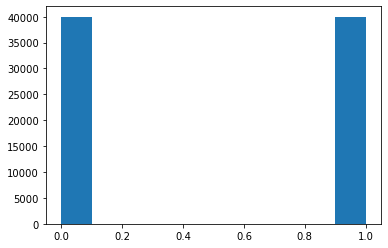

In [322]:
pd.DataFrame(y_instore4_data).hist
plt.hist(data['in-store'])

In [323]:
x_instore4_data

,age,amount,region
0,37,281.03,2
1,35,219.51,2
2,45,1525.70,4
3,46,715.25,3
4,33,1937.50,1
...,...,...,...
79995,71,558.82,1
79996,59,1932.00,3
79997,54,414.16,2
79998,49,335.32,1


In [324]:
y_instore4_data

0        0
1        0
2        1
3        1
4        1
        ..
79995    1
79996    0
79997    0
79998    1
79999    1
Name: in-store, Length: 79979, dtype: int64

In [325]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x_instore4_data, y_instore4_data,test_size = 0.3, random_state=123)
x_test

,age,amount,region
58004,19,2353.700,4
46895,49,2770.900,4
16152,47,797.210,1
62843,67,263.000,2
35729,40,1783.700,4
...,...,...,...
30581,58,2785.800,4
77188,84,197.170,2
31362,22,87.953,1
7438,56,349.800,1


In [326]:
x_test

,age,amount,region
58004,19,2353.700,4
46895,49,2770.900,4
16152,47,797.210,1
62843,67,263.000,2
35729,40,1783.700,4
...,...,...,...
30581,58,2785.800,4
77188,84,197.170,2
31362,22,87.953,1
7438,56,349.800,1


In [327]:
y_test

58004    0
46895    0
16152    1
62843    0
35729    0
        ..
30581    0
77188    0
31362    1
7438     1
14034    0
Name: in-store, Length: 23994, dtype: int64

In [328]:
#DecisionTreeClassifier(
#Modeling (Classification)
algo_instore4 = DecisionTreeClassifier(max_depth=20,)
model_instore4 = algo_instore4.fit(x_train,y_train)
#Predictions
preds_instore4= model_instore4.predict(x_test)
print(classification_report(y_test, preds_instore4))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11874
           1       0.83      0.97      0.89     12120

    accuracy                           0.88     23994
   macro avg       0.90      0.88      0.88     23994
weighted avg       0.90      0.88      0.88     23994



In [329]:
#RandomForestClassifier
#Modeling (Classification)
algo_instore4 = RandomForestClassifier()
model_instore4 = algo_instore4.fit(x_train,y_train)
#Predictions
preds_instore4= model_instore4.predict(x_test)
print(classification_report(y_test, preds_instore4))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     11874
           1       0.85      0.85      0.85     12120

    accuracy                           0.85     23994
   macro avg       0.85      0.85      0.85     23994
weighted avg       0.85      0.85      0.85     23994



In [330]:
#GradientBoostingClassifier
#Modeling (Classification)
algo_instore4 = GradientBoostingClassifier()
model_instore4 = algo_instore4.fit(x_train,y_train)
#Predictions
preds_instore4= model_instore4.predict(x_test)
print(classification_report(y_test, preds_instore4))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     11874
           1       0.82      1.00      0.90     12120

    accuracy                           0.89     23994
   macro avg       0.91      0.89      0.89     23994
weighted avg       0.91      0.89      0.89     23994



In [331]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [332]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [333]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, x_instore4_data,y_instore4_data, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)

In [334]:
results

[array([0.85402601, 0.84821205, 0.85077519, 0.84664916, 0.84976555]),
 array([0.85365091, 0.84546137, 0.84602401, 0.84477369, 0.84757737]),
 array([0.88909727, 0.88515879, 0.88909727, 0.8864091 , 0.88596436])]

In [335]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8498855934677637
Decision Tree Classifier 0.8474974690843702
Gradient Bossting Class 0.8871453608947719
